# Case Study 3 workout (continued)
After the winter break and beginning of the semester, I need to redo the meshing, since it wasn't precise. This'll be a mix of things from notebooks 3 and 4.

### Repeat of code from previous notebooks.
`1519.13.Feb.19`

In [25]:
#- Rip the boundary coordinates from the .yaml file -#
%run 'baker-cs34-functions-sandbox.py'
fn = "iea37-boundary-cs3.yaml"
bndryPts = getTurbAtrbtCs3YAML(fn)
coordList = closeBndryList(bndryPts)    # Duplicate the first coordinate for a closed boundary
#print(bndryPts)

#-- Plot the boundary (modelled with splines) --#
displaySize = np.recarray(1, coordinate)
displaySize.x = 10
displaySize.y = 10
numLinspace = 10
numGridLines = 10                   # How many gridlines we'll use for the visualization
clsdBP = closeBndryList(bndryPts)
vertexList = [0, 6, 8, 9, 18]       # Hard code the vertices (though this could be done algorithmically)
numSides = len(vertexList) - 1      # The number of sides for our original coordinate system. Usually (4) to Euclidean, but could be any number)

#-- Plot our space (with splines) --#
splineList = np.empty(numSides, interp1d)                  # Init. array IOT save the Splines for each "side"
buf = np.zeros((numSides, numGridLines, 2))                # Used to initalize the recarray to zeros
segCoordList = np.recarray([numSides, numGridLines], dtype=coordinate, buf=buf)
print(segCoordList)
#- Create the splines for each side (<numSides> many)-#
for i in range(numSides):
    BndPts = clsdBP[vertexList[i]:(vertexList[i+1]+1)]      # Extract the points for the "edge" we want
    segCoordList[i] = sliceBoundary(BndPts, numGridLines)    # Reparameterize the boundry to be defined by <numGridLines> many points
    splineList[i] = interp1d(segCoordList[i].x, segCoordList[i].y, kind='linear')   # Make the spline using NumPy's <interp1d>

[[(0., 0.) (0., 0.) (0., 0.) (0., 0.) (0., 0.) (0., 0.) (0., 0.) (0., 0.)
  (0., 0.) (0., 0.)]
 [(0., 0.) (0., 0.) (0., 0.) (0., 0.) (0., 0.) (0., 0.) (0., 0.) (0., 0.)
  (0., 0.) (0., 0.)]
 [(0., 0.) (0., 0.) (0., 0.) (0., 0.) (0., 0.) (0., 0.) (0., 0.) (0., 0.)
  (0., 0.) (0., 0.)]
 [(0., 0.) (0., 0.) (0., 0.) (0., 0.) (0., 0.) (0., 0.) (0., 0.) (0., 0.)
  (0., 0.) (0., 0.)]]


`1053.18.Feb.20`

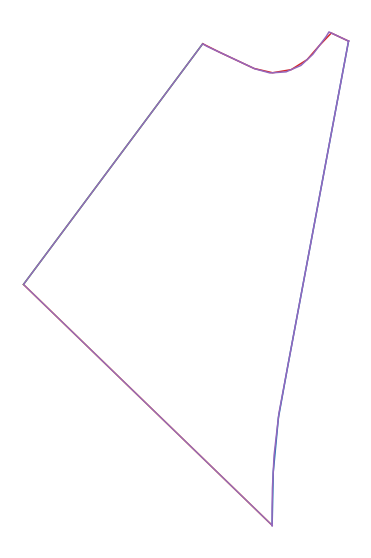

In [26]:
#- Plot the splines over the origianl coordinate list (for verification) -#
# Splines
for i in range(numSides):
    plt.hold = True
    printBoundaryArray(segCoordList[i].x, splineList[i](segCoordList[i].x), displaySize)
# Original coordinates
printBoundary(coordList,displaySize)

In [27]:
# Startup stuff
# Get our vertical lines (in the translated space)
vertLineArrayTrs = np.recarray([numGridLines,numLinspace], coordinate)
horizLineArrayTrs = np.recarray([numLinspace, numGridLines], coordinate)
gridLinspace = np.linspace(0, 1, numLinspace, endpoint=True)

# Make our endpoint arrays
rgt = 0
btm = 1
lft = 2
top = 3

# Invert the list so it's not counter-clockwise
segCoordList[btm] = segCoordList[btm][::-1]
segCoordList[rgt] = segCoordList[rgt][::-1]
print(segCoordList)

[[( 9361.3       ,  137.1       ) ( 9375.71474772,  834.4505819 )
  ( 9443.58414789, 1548.98135704) ( 9571.84546   , 2255.36619958)
  ( 9703.83788333, 2961.18849965) ( 9835.83030667, 3667.01079972)
  ( 9967.82273   , 4372.83309979) (10099.81515333, 5078.65539986)
  (10231.80757667, 5784.47769993) (10363.8       , 6490.3       )]
 [( 6098.3       , 3297.5       ) ( 6460.85359444, 2946.34241966)
  ( 6823.40718889, 2595.18483932) ( 7185.96078333, 2244.02725898)
  ( 7548.51437777, 1892.86967865) ( 7911.06797221, 1541.71209831)
  ( 8273.62513918, 1190.55820648) ( 8636.18342612,  839.40547098)
  ( 8998.74171306,  488.25273549) ( 9361.3       ,  137.1       )]
 [( 6098.3       , 3297.5       ) ( 6359.63333333, 3648.36666667)
  ( 6620.96666667, 3999.23333333) ( 6882.3       , 4350.1       )
  ( 7143.63333333, 4700.96666667) ( 7404.96666667, 5051.83333333)
  ( 7666.3       , 5402.7       ) ( 7927.63333333, 5753.56666667)
  ( 8188.96666667, 6104.43333333) ( 8450.3       , 6455.3       )]
 [( 845

In [28]:
#--- Do just straight lines (as a test) ---#
#- Plot the boundary and the endpoints.
#for i in range(numSides):
#    plt.hold = True
#    printBoundaryArray(segCoordList[i].x, splineList[i](segCoordList[i].x), displaySize)
#- Plot the grid lines
#for i in range(numGridLines):
#    for j in range(numLinspace):
#        vertLineArrayTrs[i][j].y = (segCoordList[top][i].y - segCoordList[btm][i].y)* gridLinspace[j] + segCoordList[btm][i].y
#        vertLineArrayTrs[i][j].x = (segCoordList[top][i].x - segCoordList[btm][i].x)* gridLinspace[j] + segCoordList[btm][i].x
#    plt.plot(vertLineArrayTrs[i].x, vertLineArrayTrs[i].y)
#-- end test --#

All the above works and is understood. `1120.18.Feb.20`

### Contouring to the boundary
`1120.18.Feb.20`

This is where there was an imperfection last time.

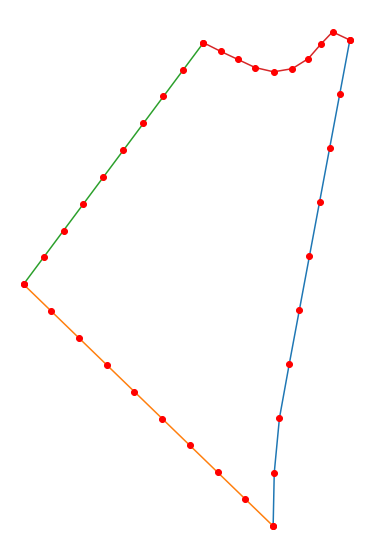

In [29]:
#- Plot the splines with grid vertices along the splines -#
for i in range(numSides):
    plt.hold = True
    printBoundaryArray(segCoordList[i].x, splineList[i](segCoordList[i].x), displaySize)
    printVerticies(segCoordList[i], list(range(numGridLines)), 'red')

#printBoundary(coordList,displaySize) # Print original boundary as check

`1130.18.Feb.20`

Now we have to make the lines, and ensure they:

1. Countour to the sides
2. **Reach the correct endpoints**

Note that (2) is where there was a disconnect last time.

For the Vertical lines, the algorithm needs to:
1. Loop through every line (numGridLines many)
2. Loop from bottom to top (numLinspace many times)

And at each of these iterations, it will calculate the coordinate by:
1. x-coord by a weight. If it's at the bottom, it lies upon the boundary. Then it is a percentage between top and bottom, depending on where along the line it is.
2. y-coord same thing.

## Gravity method explanation
`1723.18.Feb.20`

#### Initial Notes

So I spent quite some time on the markerboard and in my lab book to work some things out by hand regarding the effects the points placement for the translated gridlines. In the picture below, the problem comes from using the side walls as the sole means of calculating the x-coordinates for the grid lines. You can see the dark blue grid line (6th from the left) extends past the uppermost boundary, but the 'x' marks the spot along the upper boundary where the gridline's endpoint should be. Upon further inspection, I realized that any boundary that has a 2nd derivative sign change (up to down to up) will give my old way of calculating it problems. So I had to come up with another method.

<img src="figures/BadGrid1.png" alt="Error in gridline placement" width="800"/>

Though I erased the work on the board, I transcribed the results in my lab book of the formula for how to weigh coordinate calculation:

<img src="figures/notebook-scans/gridformula1.jpg" alt="Error in gridline placement" width="500"/>
<img src="figures/notebook-scans/gridformula2.jpg" alt="Error in gridline placement" width="600"/>

Explaining this, as we travere the gri line from bottom to top, at the very top we should be coincident with the upper boundary. This means that there should be a weight going from 0 to 1 as we go from bottom to top, where with 0, the top coordinate has no effect on grid placement, and at the top it is the same number. I actually calculated it so that it only has an effect beginning in the middle., and that in the exact middle, only the sides effect coordinate placement. So the weight system is described in the following formula:

\begin{equation*}
x_{val} = \big( \alpha \big) x_{top} + \big( \phi \big) x_{sides} + \big( \sigma \big) x_{bottom}
\end{equation*}

where:

\begin{align}
\alpha &= x - \big|0.5 - |0.5 - x| \big| \\
\phi   &= 1- \big| 2(x-0.5)\big|\\
\sigma &= (1-x) - \big| |x-0.5|-0.5 \big|\\
\end{align}

With values in the following table:

Null| Bottom | Sides | Top
--- | ---  | --- | ---
1.00|0.0|0.0|1.0
0.75|0.0|0.5|0.5
0.50|0.0|1.0|0.0
0.25|0.5|0.5|0.0
0.00|1.0|0.0|0.0

This is all theoretical at this point. I call it the "Gravity Method", and I'll have to code it up and test it out.

#### Notes

`1933.18.Feb.20`

I see now that my math was wrong. The weighting system I have give it a curved/parabolic trend. It's getting late tonight, so I'll have to rework the math tomrrow. I think it's because I currently have the top and bottom contributing 1/4th instead of 1/3rd. the same with the center.

`1013.19.Feb.20`

I spoke with Eduardo last night and he made me realize an obvious error. My weight system has been linear, which is why it wasn't working. He used the Tangent function (which has a slight curve), but I should've realized - if I'm calling this the *gravity method*, I should prbably use the equation for *gravity*, which itself isn't linear:

\begin{equation*}
F_g = \frac{G  m_1 m_2}{r^2}
\end{equation*}

where **G** is the gravitational constant, **m** is the mass of each object, and **r** is the distance between them.

I'll try a version of this equation, then I'll try maybe a cubic or quadratic solution. If those all fail, I'll go with Eduardo's tangent function.

`1315.19.Feb.20`

#### Notes
`1631.21.Feb.20`

I needed some "air support", so at 14:30 today went over to the math department and spoke with a [Dr. Halverson](https://math.byu.edu/?mtt_page=denise-halverson), who mentioned the phrase **Conformal Mapping**. She also directed me to [Dr. Lawlor](https://math.byu.edu/?mtt_page=gary-lawlor), who said it probably has to do with set theory and the complex plane, but again remphasized the phrase "*conformal mapping*". Looking up papers on [Google Scholar](https://scholar.google.com/scholar?hl=en&as_sdt=0%2C45&q=conformal+mapping+technique&btnG=&oq=conformal+mapping) I found a few papers, and am currently reading them.

`1655.21.Feb.20`
[This](https://www.cs.rit.edu/usr/local/pub/ncs/ImageBased/WarpMorph.pdf) paper introduced me to the phrase "*bilinear mapping*", (shown in the below figure), which is a map from the unit square to any quadrilateral, but only gives an algorithm that would work on quadrilaterals with linear (uncurved) sides.

<img src="figures/BilnearMapping.png" alt="Bilinear Mapping example" width="400"/>

`1730.21.Feb.20`

Another phrase that keeps popping up in phrases I'm reading is "*parametric surface*".

## Gravity method implementation
`1723.18.Feb.20`

In [173]:
def calcTopWt(PrcntFrmBtm, MaxWt):
    # Calculates the weight that should be given to the top boundary points
    # <PrcntFrmBtm> is 0-1 where 0 denotes the bottom, 1 denotes the top of the line.
    if(PrcntFrmBtm > 0.5):
        Alpha = ((PrcntFrmBtm-(0.5))**4)*16
    else:
        Alpha = 0.0
        
    return abs(Alpha)

def calcLatWt(PrcntFrmBtm, MaxWt):
    # Calculates the weight that should be given to the side-averaged boundary points
    # <PrcntFrmBtm> is 0-1 where 0 denotes the bottom, 1 denotes the top of the line.
    Phi = 1-(((PrcntFrmBtm-(0.5))**4)*16)

    return abs(Phi)

def calcBtmWt(PrcntFrmBtm, MaxWt):
    # Calculates the weight that should be given to the bottom boundary points
    # <PrcntFrmBtm> is 0-1 where 0 denotes the bottom, 1 denotes the top of the line.
    if(PrcntFrmBtm < 0.5):
        Sigma = ((PrcntFrmBtm-(0.5))**4)*16
    else:
        Sigma = 0.0
    
    return abs(Sigma)

def calcLatAvg(EndCoord, StartCoord, PrcntFrmStart):
    # Calculates the average value between two passed coordinate values.
    AvgdCoord = ((EndCoord - StartCoord) * PrcntFrmStart) + StartCoord
    return AvgdCoord

In [161]:
# For Posterity. delete if weighting function works.
def calcTopWt(PrcntFrmBtm, MaxWt):
    # Calculates the weight that should be given to the top boundary points
    # <PrcntFrmBtm> is 0-1 where 0 denotes the bottom, 1 denotes the top of the line.
    if(PrcntFrmBtm >= (1-MaxWt)):
        Alpha = (PrcntFrmBtm - (1-MaxWt) ) / MaxWt
    else:
        Alpha = 0.0
        
    return Alpha

def calcLatWt(PrcntFrmBtm, MaxWt):
    # Calculates the weight that should be given to the side-averaged boundary points
    # <PrcntFrmBtm> is 0-1 where 0 denotes the bottom, 1 denotes the top of the line.
    if(PrcntFrmBtm < MaxWt):
        Phi = PrcntFrmBtm/MaxWt
    elif(PrcntFrmBtm > (1-MaxWt)):
        Phi = 1-((PrcntFrmBtm-(1-MaxWt))/MaxWt)
    else:
        Phi = 1.0
    return Phi

def calcBtmWt(PrcntFrmBtm, MaxWt):
    # Calculates the weight that should be given to the bottom boundary points
    # <PrcntFrmBtm> is 0-1 where 0 denotes the bottom, 1 denotes the top of the line.
    if(PrcntFrmBtm <= MaxWt):
        Sigma = (MaxWt-PrcntFrmBtm)/MaxWt
    else:
        Sigma = 0.0
    
    return Sigma

Problem is with the y-values


1.0
0.0
0.0
1.0

1.0
0.0
0.6340496875476299
0.3659503124523701

1.0
0.0
0.9047401310775797
0.09525986892242037

1.0
0.0
0.9876543209876543
0.012345679012345685

1.0
0.0
0.9998475842097241
0.00015241579027587286

1.0
0.00015241579027587286
0.9998475842097241
0.0

1.0
0.012345679012345668
0.9876543209876544
0.0

1.0
0.09525986892242022
0.9047401310775798
0.0

1.0
0.36595031245236986
0.6340496875476301
0.0

1.0
1.0
0.0
0.0

1.0
0.0
0.0
1.0

1.0
0.0
0.6340496875476299
0.3659503124523701

1.0
0.0
0.9047401310775797
0.09525986892242037

1.0
0.0
0.9876543209876543
0.012345679012345685

1.0
0.0
0.9998475842097241
0.00015241579027587286

1.0
0.00015241579027587286
0.9998475842097241
0.0

1.0
0.012345679012345668
0.9876543209876544
0.0

1.0
0.09525986892242022
0.9047401310775798
0.0

1.0
0.36595031245236986
0.6340496875476301
0.0

1.0
1.0
0.0
0.0

1.0
0.0
0.0
1.0

1.0
0.0
0.6340496875476299
0.3659503124523701

1.0
0.0
0.9047401310775797
0.09525986892242037

1.0
0.0
0.9876543209876543
0.01234567

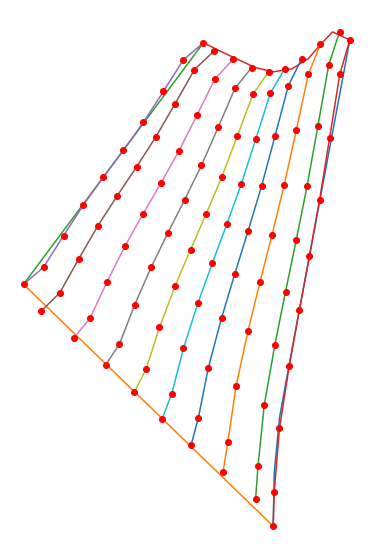

In [181]:
# Plot the boundary and the endpoints.
for i in range(numSides):
    plt.hold = True
    printBoundaryArray(segCoordList[i].x, splineList[i](segCoordList[i].x), displaySize)
    #printVerticies(segCoordList[i], list(range(numGridLines)), 'red')

EndWeight = 0.5 # The percentage at which the sides start to pull

# Do the vertical lines
yStartCoord = splineList[btm](segCoordList[btm].x)
yEndCoord = splineList[top](segCoordList[top].x)
xEndCoord = segCoordList[rgt].x
xStartCoord = segCoordList[lft].x
for i in range(numGridLines):
    for j in range(numLinspace):
        # For all 3 y-vals (top, sides, btm) it is <Calculated Weight> * <Value>
        yTop   = splineList[top](segCoordList[top][i].x)
        ySides = calcLatAvg(yEndCoord[i], yStartCoord[i], gridLinspace[j])
        yBtm   = splineList[btm](segCoordList[btm][i].x)
        vertLineArrayTrs[i][j].y =    (calcTopWt(gridLinspace[j], EndWeight)* yTop)\
                                    + (calcLatWt(gridLinspace[j], EndWeight)* ySides)\
                                    + (calcBtmWt(gridLinspace[j], EndWeight)* yBtm)
        # For all 3 x-vals
        xTop   = segCoordList[rgt][j].x
        xSides = calcLatAvg(xEndCoord[j], xStartCoord[j], gridLinspace[i])
        xBtm   = segCoordList[lft][j].x
        vertLineArrayTrs[i][j].x =    (calcTopWt(gridLinspace[i], EndWeight)* xTop)\
                                    + (calcLatWt(gridLinspace[i], EndWeight)* xSides)\
                                    + (calcBtmWt(gridLinspace[i], EndWeight)* xBtm)
        print()
        print(calcTopWt(gridLinspace[j], EndWeight) + calcLatWt(gridLinspace[j], EndWeight) + calcBtmWt(gridLinspace[j], EndWeight))
        print(calcTopWt(gridLinspace[j], EndWeight))
        print(calcLatWt(gridLinspace[j], EndWeight))
        print(calcBtmWt(gridLinspace[j], EndWeight))
    plt.plot(vertLineArrayTrs[i].x, vertLineArrayTrs[i].y)
    printVerticies(vertLineArrayTrs[i], list(range(numLinspace)), 'red')

#plt.plot(vertLineArrayTrs[6][numLinspace-1].x, vertLineArrayTrs[6][numLinspace-1].y, 'x')
#plt.plot(segCoordList[top][6].x, yEndCoord[6], 'x')
#plt.plot(segCoordList[btm][6].x, yStartCoord[6], 'x')
    
# Do the horizontal lines
#for i in range(numLinspace):
    #xStartCoord = segCoordList[lft][i].x
    #xEndCoord = segCoordList[rgt][i].x
#    for j in range(numGridLines):
#plt.savefig('BadGrid.pdf')

In [117]:
# Run the code written in notebook 02
#%run 'baker-cs34-functions.py'

#displaySize = np.recarray(1, coordinate)
#displaySize.x = 10
#displaySize.y = 10
#numLinspace = 25
#numGridLines = 25                   # How many gridlines we'll use for the visualization
#gridLinspace = np.linspace(0, 1, numLinspace, endpoint=True)

`1156.20.Feb.20`

Talking to Dr. Ning, he reccommends ditching the mapping method and just get an optimized result from a chopped-off boundary section. Once I have that number, then move one into the eliminated but valid region, and see how much the power output changes. If it's significant, then there's justification to use every space. If not, then it's not worth the time right now.